In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [119]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [120]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [122]:
df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1, inplace=True)


In [123]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [125]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [126]:
df.dropna(subset= ['embarked'], inplace=True)

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [128]:
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

In [129]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,False
1,1,1,0,38.0,1,0,71.2833,0,False
2,1,3,0,26.0,0,0,7.9250,2,True
3,1,1,0,35.0,1,0,53.1000,2,False
4,0,3,1,35.0,0,0,8.0500,2,True


In [130]:
df = df.astype(int)

In [131]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


In [132]:
X = df.drop('survived', axis=1)
y = df['survived']

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [134]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [135]:
y_pred = model.predict(X_test)

In [136]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [138]:
accuracy_score(y_test, y_pred)

0.8033707865168539

In [139]:
confusion_matrix(y_test, y_pred)

array([[90, 19],
       [16, 53]])

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



K-NN

In [141]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
ss = StandardScaler()

In [144]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)


In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)

In [146]:
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [147]:
knn_pred = knn.predict(X_test_scaled)

In [148]:
knn_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [149]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       109
           1       0.72      0.71      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [150]:
accuracy_score(y_test, knn_pred)

0.7808988764044944

In [151]:
confusion_matrix(y_test, knn_pred)

array([[90, 19],
       [20, 49]])

Naive Bayes


In [152]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [153]:
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [154]:
pred_nb = nb.predict(X_test)

In [155]:
print(classification_report(y_test,pred_nb ))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



In [156]:
accuracy_score(y_test, pred_nb)

0.7752808988764045

In [157]:
confusion_matrix(y_test, pred_nb )

array([[84, 25],
       [15, 54]])

Decision Tree


In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
dtc = DecisionTreeClassifier(random_state=42)

In [160]:
dtc.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [161]:
y_pred = dtc.predict(X_test_scaled)

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



In [163]:
accuracy_score(y_test, y_pred)

0.7696629213483146

In [164]:
from sklearn.model_selection import GridSearchCV
params = {
  'criterion':['gini', 'entropy', 'log_loss'],
  'splitter':['best', 'random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
}
cv = GridSearchCV(dtc, param_grid = params, cv=5, scoring='accuracy')


In [165]:
cv.fit(X_train_scaled, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [166]:
y_pred = cv.predict(X_test_scaled)

In [167]:
accuracy_score(y_test, y_pred)

0.797752808988764

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.78      0.67      0.72        69

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



[Text(0.35451347029997493, 0.98, 'x[1] <= -0.347\ngini = 0.472\nsamples = 711\nvalue = [440, 271]'),
 Text(0.17322144288577154, 0.94, 'x[0] <= 0.213\ngini = 0.38\nsamples = 239\nvalue = [61, 178]'),
 Text(0.26386745659287325, 0.96, 'True  '),
 Text(0.07615230460921844, 0.9, 'x[5] <= -0.064\ngini = 0.076\nsamples = 126\nvalue = [5, 121]'),
 Text(0.06813627254509018, 0.86, 'x[5] <= -0.084\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(0.06012024048096192, 0.82, 'x[2] <= 2.004\ngini = 0.14\nsamples = 53\nvalue = [4, 49]'),
 Text(0.04008016032064128, 0.78, 'x[2] <= 0.556\ngini = 0.111\nsamples = 51\nvalue = [3, 48]'),
 Text(0.02404809619238477, 0.74, 'x[3] <= -0.046\ngini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(0.01603206412825651, 0.7, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.03206412825651302, 0.7, 'x[5] <= -0.196\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.02404809619238477, 0.66, 'x[3] <= 0.81\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0

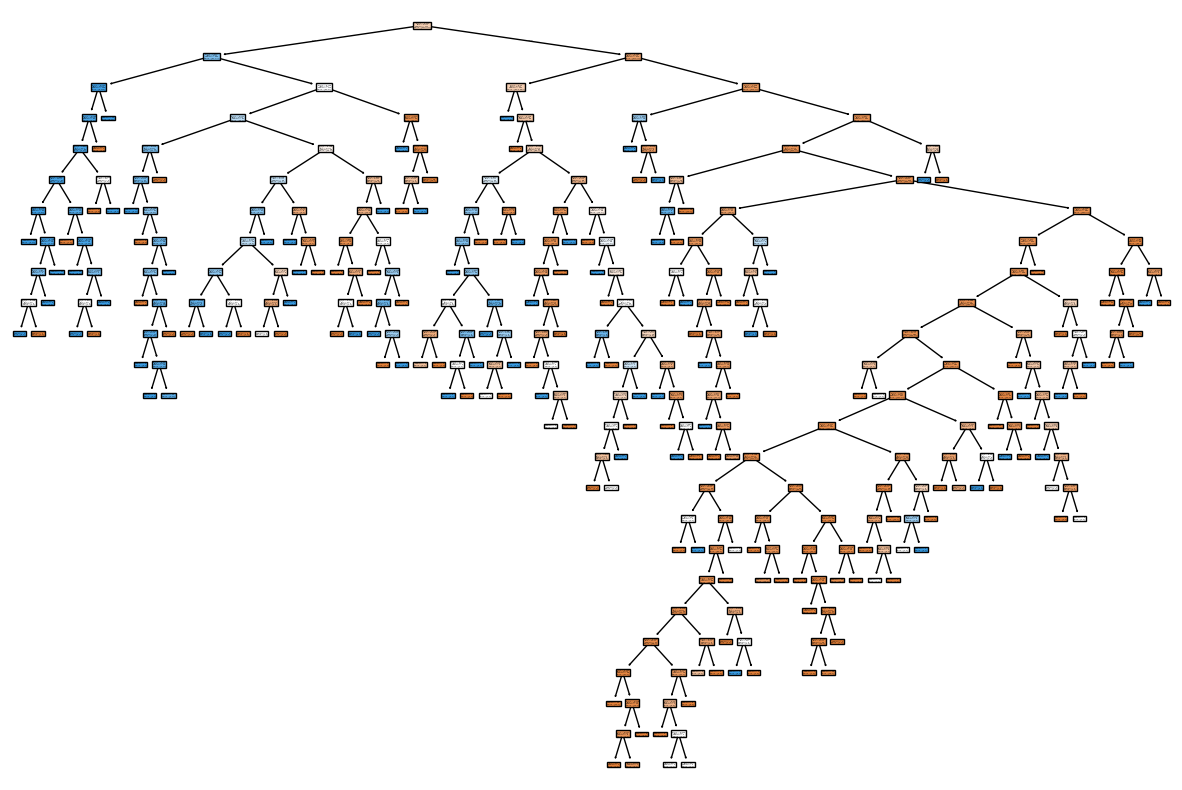

In [169]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc, filled =True)

SVM


In [170]:
from sklearn.svm import SVC
svc = SVC(kernel= 'rbf')         

In [171]:
svc.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [172]:
y_pred = svc.predict(X_test_scaled)

In [173]:
accuracy_score(y_test, y_pred)

0.8258426966292135

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.80      0.74      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178

